In [3]:
%load_ext autoreload
%autoreload 2
%matplotlib inline
import motrack
import getcoords
import utils
import numpy as np
import cv2
import params as p
import matplotlib.pyplot as plt

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [3]:
import subprocess
call = '''python motrack.py -v "videos/N2070_1_day7_1mth.m4v" -p "params_init"'''
subprocess.run(call)

CompletedProcess(args='python motrack.py -v "videos/N2070_1_day7_1mth.m4v" -p "params_init"', returncode=1)

In [18]:
import glob
import os
import subprocess
import time
# basepath = "Q:\\EIN Group\\MartinHolub\\1mth-day1\\"
basepath = ""
file_name = "*.m4v"

for i, fname in enumerate(list(glob.glob(basepath + file_name))):
    base_call = "python motrack.py"
    base_call = base_call + " -v " + fname
    
    if i == 0:
        call = base_call + " -p " + "params_init"
    if i > 0:
        call = base_call
    
    
    start_time = time.clock()
    completed = subprocess.run(call)    
    check_status = "returncode: {},".format(completed)
    timing = " time: {:.2f}s".format(time.time() - start_time))
    print(check_satus + timing)
    

Q:\EIN Group\MartinHolub\1mth-day1
Clip81.m4v
Q:\EIN Group\MartinHolub\1mth-day1
N2070_1_day7_1mth.m4v
Q:\EIN Group\MartinHolub\1mth-day1
N2070_2_day1_1mth.m4v
Q:\EIN Group\MartinHolub\1mth-day1
N2070_3_day1_1mth.m4v
Q:\EIN Group\MartinHolub\1mth-day1
N2071_1_day1_1mth.m4v
Q:\EIN Group\MartinHolub\1mth-day1
N2071_2_day1_1mth.m4v
Q:\EIN Group\MartinHolub\1mth-day1
N2071_3_day1_1mth.m4v
Q:\EIN Group\MartinHolub\1mth-day1
N2072_1_day1_1mth.m4v
Q:\EIN Group\MartinHolub\1mth-day1
N2072_2_day1_1mth.m4v
Q:\EIN Group\MartinHolub\1mth-day1
N2072_3_day1_1mth.m4v
Q:\EIN Group\MartinHolub\1mth-day1
N2218_1_day1_1mth.m4v
Q:\EIN Group\MartinHolub\1mth-day1
N2218_2_day1_1mth.m4v
Q:\EIN Group\MartinHolub\1mth-day1
N2218_3_day1_1mth.m4v
Q:\EIN Group\MartinHolub\1mth-day1
N2219_1_day1_1mth.m4v
Q:\EIN Group\MartinHolub\1mth-day1
N2219_2_day1_1mth.m4v
Q:\EIN Group\MartinHolub\1mth-day1
N2219_3_day1_1mth.m4v
Q:\EIN Group\MartinHolub\1mth-day1
N2221_1_day1_1mth.m4v
Q:\EIN Group\MartinHolub\1mth-day1
N2221_2

Goal - run the script on a folder of videos and obtain traveled distances and times as an output.
Pseudocode:
    Run code and for:
        i == 1, save both init and corresponding dat with repeatability information. Save output data
            save_init = true, reinitalize_iii = True
        i > 1, load roi_hist +  background from init and save pts + frame_pos to file name 
            accordingly. Save output data
            save_init = false, reinitialize_roi = True
        
        
    
    


In [29]:
import subprocess
subprocess.run("""python motrack.py -v "videos/N2070_1_day7_1mth.m4v" """)

CompletedProcess(args='python motrack.py -v "videos/N2070_1_day7_1mth.m4v" ', returncode=1)

In [211]:
pts = np.array([[1259,  520],
               [1259,  626],
               [1434,  626],
               [1434,  520]], dtype = np.int32)
frame = cv2.imread('videos/frame.png')
background, mask_fgd = motrack.segment_background(frame, pts)

In [127]:
frame = motrack.subtract_background(frame, background, [])

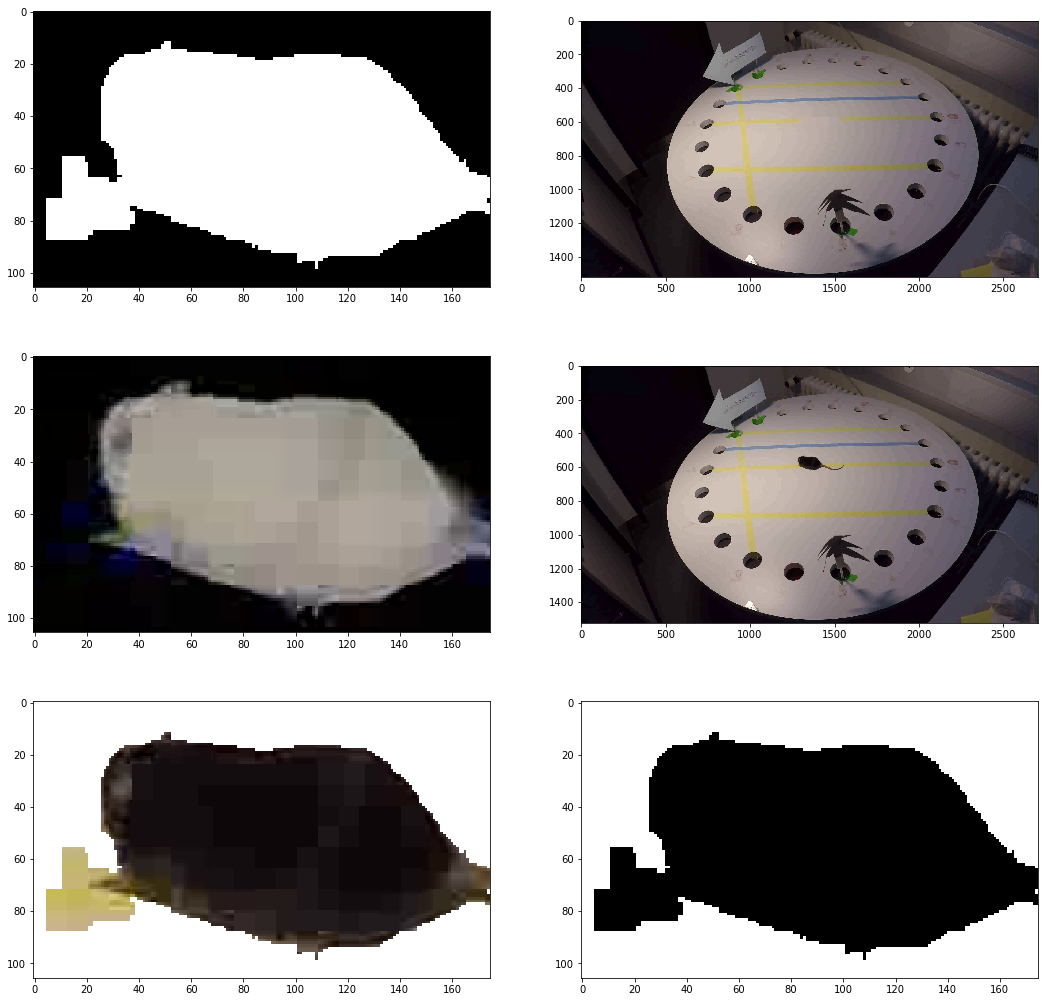

In [238]:
mask_bgd = np.invert(mask_fgd, dtype = np.uint8)
frame_sub1 = cv2.subtract(background, frame, mask = mask_bgd)

#frame_sub2 = cv2.bitwise_and(frame, background, mask = mask_bgd)
#frame_sub2[mask_fgd == 0] = np.abs(background - frame)[mask_fgd == 0]

frame_sub3 = frame.copy()
frame_sub3[mask_fgd == 0,:] = np.ones_like(frame,dtype=np.uint8)[mask_fgd == 0,:]*255

#frame_sub = cv2.absdiff(background, frame)
#frame_sub = cv2.cvtColor(frame_sub, cv2.COLOR_BGR2GRAY)
#frame_sub = frame_sub > 0
# cv2.normalize(  frame_sub1, frame_sub1,
#                  alpha = 0, beta = 255, norm_type = cv2.NORM_MINMAX,
#                  dtype=cv2.CV_8U)

fig, ax = plt.subplots(3, 2, figsize = (18, 18))

ax[0,0].imshow(mask_fgd[pts[0][0]:pts[1][0], pts[0][1]:pts[2][1]],cmap="gray")
ax[0,1].imshow(background,cmap="gray")
ax[1,0].imshow(frame_sub1[pts[0][0]:pts[1][0], pts[0][1]:pts[2][1],:],cmap="gray")
ax[1,1].imshow(frame,cmap="gray")
ax[2,0].imshow(frame_sub3[pts[0][0]:pts[1][0], pts[0][1]:pts[2][1],:],cmap="gray")
ax[2,1].imshow(mask_bgd[pts[0][0]:pts[1][0], pts[0][1]:pts[2][1]],cmap="gray")
plt.show()

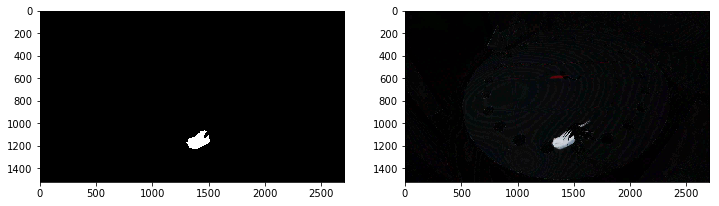

(1520, 2704)

In [12]:
params = dict(  kSize_gauss = (3,3), sigmaX = 1,
                        kSize_canny = (5,5))
frame_avg = cv2.imread('videos/frame_avg1.png')
prob_mask = cv2.imread('videos/prob_mask1.png')

(prob_mask, vis_image) = motrack.check_min_area(prob_mask, frame_avg, **params )

fig, (ax1, ax2) = plt.subplots(1,2, figsize = (12, 6))
ax1.imshow(vis_image, cmap = 'bone')
ax2.imshow(frame_avg, cmap = 'bone')
plt.show()
vis_image.shape

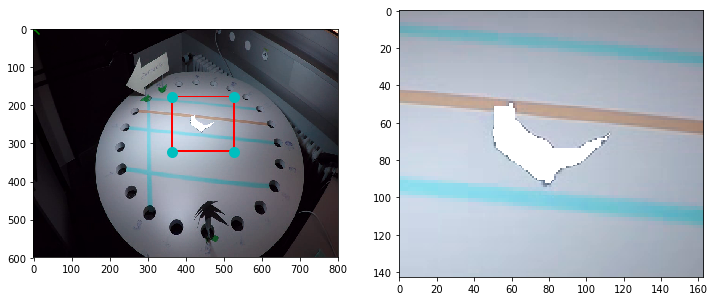

In [38]:
args = np.load("SO3049_1.avi.npz")
frame = args["arr_0"]
bbox = tuple(args["arr_1"])

params = dict(  kSize_gauss = p.kSize_gauss, sigmaX = p.sigmaX,
                kSize_canny = p.kSize_canny, padding = p.padding)
roi, bbox_new = motrack.update_bbox_location(frame, bbox, **params)

In [6]:
vid_src = "vids\\SO349_1.avi"
utils.get_in_out_names(vid_src, True, True)

['vids\\SO349_1.avi', 'vids\\SO349_1.avi', 'inits\\init.avi', None]

In [7]:
testf = np.load("inits/init.dat")
testf.keys()

dict_keys(['background', 'roi_hist', 'pts', 'chs', 'h_ranges'])

In [8]:
testf2 = np.load("inits/SO3043_1.dat")
testf2.keys()

dict_keys(['background', 'pts', 'frame_pos'])

In [11]:
a = np.ndarray([1, 2, 3])
a.ndim

3

In [27]:
dd = dict(spam = "ham", eggs = 4)
ddk = list(dd.keys())

In [47]:
vid_src = "tests\\res\\test.avi"
vid = cv2.VideoCapture(vid_src)
fname = "file.ext"

vid_out = utils.define_video_output(fname, vid, 25, 5, 500)

> c:\users\marti\downloads\converted\utils.py(253)define_video_output()
-> vid_out = cv2.VideoWriter(vid_name,fourcc, fps / step, (width, out_height))
(Pdb) vid_name
'out_file.avi'
(Pdb) n
> c:\users\marti\downloads\converted\utils.py(255)define_video_output()
-> return vid_out
(Pdb) n
--Return--
> c:\users\marti\downloads\converted\utils.py(255)define_video_output()-><VideoWriter 0000015FB9044E10>
-> return vid_out
(Pdb) n
--Return--
> <ipython-input-47-3e01e9c34e42>(5)<module>()->None
-> vid_out = utils.define_video_output(fname, vid, 25, 5, 500)
(Pdb) n
> c:\users\marti\miniconda2\envs\py36\lib\site-packages\ipython\core\interactiveshell.py(2865)run_code()
-> sys.excepthook = old_excepthook
(Pdb) c


In [75]:
with open("somefile.txt", "w") as f:
    curr_size = f.tell()

#### Next you need to:
    - Make the search more robust (try different hardcoded values, some more filtering, ...)
    - Have one function for the same part of algorithm, but pass different flags to have different aproaches

    Code graveyrard, to be deleted once things are working:
    

In [76]:
curr_size

0